In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys
sns.set_theme(style="whitegrid", font_scale=1.1)

sys.path.append("../EDA")
DATA_PATH = "../instruction/movieReplicationSet.csv"
ALPHA = 0.005

import movie_data_formatter as mdf
import movie_rating_gender as mrgy
import general_functions as gf

df = pd.read_csv(DATA_PATH)
df = mdf.clean_data(df)
processed_data = mdf.convert_to_table(df)



# Q7: Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

In [13]:
movies_are_best_enjoyed_alone = processed_data[['movie_name', 'year', 'rating', 'movies_are_best_enjoyed_alone']]
wall_street_data = movies_are_best_enjoyed_alone[(movies_are_best_enjoyed_alone['movie_name'] == 'The Wolf of Wall Street') & (movies_are_best_enjoyed_alone['year'] == '2013')]
wall_street_data = wall_street_data.dropna(subset=['rating', 'movies_are_best_enjoyed_alone'])


# stats
variation_table = wall_street_data.groupby('movies_are_best_enjoyed_alone')['rating'].agg(['count', 'mean', 'median', 'var', 'std']).reset_index()
print(variation_table)


   movies_are_best_enjoyed_alone  count      mean  median       var       std
0                           -1.0      4  3.625000    3.75  0.229167  0.478714
1                            0.0    270  3.033333    3.00  0.848327  0.921047
2                            1.0    393  3.143766    3.50  0.756702  0.869886


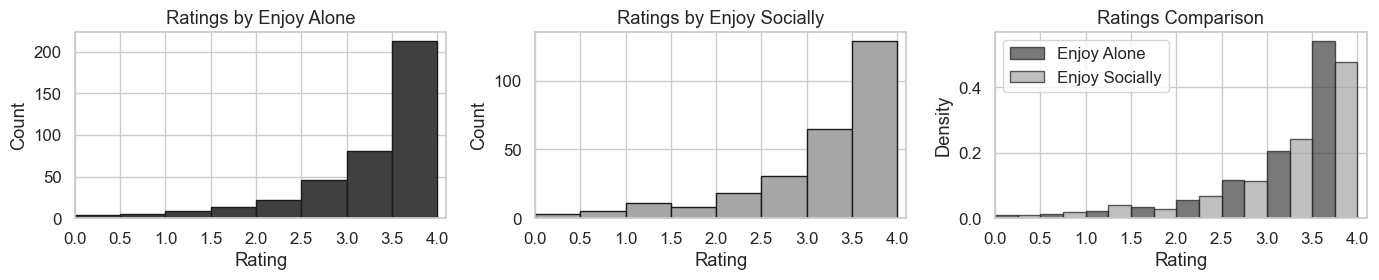

In [15]:
import numpy as np
import matplotlib.pyplot as plt

yes_group = wall_street_data[wall_street_data['movies_are_best_enjoyed_alone'] == 1]['rating']
no_group  = wall_street_data[wall_street_data['movies_are_best_enjoyed_alone'] == 0]['rating']
yes_label = "Enjoy Alone"
no_label  = "Enjoy Socially"


# bins and centers (ratings 1–4 in 0.5 steps)
bin_edges  = np.arange(0, 4.5, 0.5)                  # [1.0, 1.5, ..., 4.5]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2   # [1.25, 1.75, ..., 3.75]
xticks = np.arange(0, 4.01, 0.5)

# counts per bin
counts_only, _ = np.histogram(yes_group, bins=bin_edges)
counts_not,  _ = np.histogram(no_group, bins=bin_edges)

# bar layout
width = 0.5
fig, ax = plt.subplots(1, 3, figsize=(14, 3))

ax[0].bar(bin_centers, counts_only, width=width, label=yes_label, color="0.25", edgecolor="0.1")
ax[1].bar(bin_centers, counts_not,  width=width, label=no_label, color="0.65", edgecolor="0.1")

# labels & axes
ax[0].set_title(f"Ratings by {yes_label}")
ax[1].set_title(f"Ratings by {no_label}")
for a in ax:
    a.set_xlabel("Rating")
    a.set_ylabel("Count")
    a.set_xticks(xticks)
    a.set_xlim(0, 4.1)
    
# combined plot for density comparison
counts_only = counts_only / counts_only.sum()
counts_not  = counts_not  / counts_not.sum()

ax[2].bar(bin_centers - width/4, counts_only, width=width/2, label=yes_label, color="0.25", edgecolor="0.1", alpha=0.7)
ax[2].bar(bin_centers + width/4, counts_not,  width=width/2, label=no_label, color="0.65", edgecolor="0.1", alpha=0.7)
ax[2].set_title("Ratings Comparison")
ax[2].set_xlabel("Rating")
ax[2].set_ylabel("Density")
ax[2].set_xticks(xticks)
ax[2].set_xlim(0, 4.1)
ax[2].legend()

plt.tight_layout()

plt.savefig("../figures/wall_street_rating_social_distribution.pdf", dpi=300)


In [18]:
# Mann-Whitney U Test
u_statistic, p_value = stats.mannwhitneyu(
    yes_group, 
    no_group, 
    alternative='greater', # one-tailed test,
    use_continuity=False
)
print(f"Mann-Whitney U Test: U = {u_statistic}, p-value = {p_value}")


if p_value < ALPHA:
    print(f"Reject the null hypothesis at alpha = {ALPHA}.")
    print("Conclusion: Viewers who enjoy 'The Wolf of Wall Street' alone tend to give higher ratings than those who enjoy it socially.")
else:
    print(f"Fail to reject the null hypothesis at alpha = {ALPHA}.")
    print("Conclusion: No significant difference in ratings between viewers who enjoy 'The Wolf of Wall Street' alone and those who enjoy it socially.")

Mann-Whitney U Test: U = 56806.5, p-value = 0.05635816949888383
Fail to reject the null hypothesis at alpha = 0.005.
Conclusion: No significant difference in ratings between viewers who enjoy 'The Wolf of Wall Street' alone and those who enjoy it socially.
